<a href="https://colab.research.google.com/github/abhishekchandar/IN-rainfall-analysis/blob/main/_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 




1.   LR, ,FLAPP, MLP, K-NN, ANN and MANN are usually called data-drivenmodels because they 
capture the mapping between input (e.g.,antecedent rainfall) and output variables (forecasted rainfall) without directly considering the physical laws that underlie the mechanism of rainfall (or precipitation). These models are purely based on the information retrieved from the collected rainfall data.
2.    In order to use statisical model such as ARIMA, non stationary data can be converted into stationary data.

*    MA, PCA and SSA are some options for data preprocessing before giving them as input to a given model

 References:
 https://www.researchgate.net/publication/222522809_Prediction_of_rainfall_time_series_using_modular_artificial_neural_networks_coupled_with_data-preprocessing_techniques

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [96]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [97]:
India = pd.read_excel("1a.xlsx")

In [98]:
India.head()

,YEAR,ACTL,CI,NE,NW,SP,JJAS
0,1901,ACTL,834.9,1265.2,511.0,635.7,751.7
1,1902,ACTL,837.1,1461.4,525.0,686.2,794.0
2,1903,ACTL,963.4,1280.7,629.8,857.9,880.5
3,1904,ACTL,821.3,1344.9,551.3,606.7,764.8
4,1905,ACTL,782.8,1482.5,437.9,573.2,727.9


In [99]:
print('Rows     :',India.shape[0])
print('Columns  :',India.shape[1])
print('\nFeatures :\n     :',India.columns.tolist())
print('\nMissing values    :',India.isnull().values.sum())
print('\nUnique values :  \n',India.nunique())

Rows     : 119
Columns  : 7

Features :
     : ['YEAR', 'ACTL', 'CI', 'NE', 'NW', 'SP', 'JJAS']

Missing values    : 0

Unique values :  
 YEAR    119
ACTL      1
CI      118
NE      117
NW      118
SP      117
JJAS    119
dtype: int64


,Total,Percent
JJAS,0,0.0
SP,0,0.0
NW,0,0.0
NE,0,0.0
CI,0,0.0


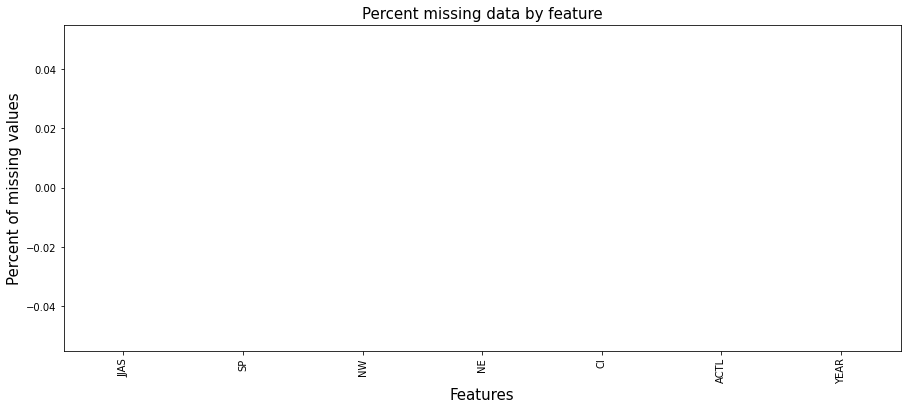

In [100]:
total = India.isnull().sum().sort_values(ascending=False)
percent = (India.isnull().sum()/India.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [101]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    119 non-null    int64  
 1   ACTL    119 non-null    object 
 2   CI      119 non-null    float64
 3   NE      119 non-null    float64
 4   NW      119 non-null    float64
 5   SP      119 non-null    float64
 6   JJAS    119 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.6+ KB


In [102]:
# India['JAN'].fillna((India['JAN'].mean()), inplace=True)
# India['FEB'].fillna((India['FEB'].mean()), inplace=True)
# India['MAR'].fillna((India['MAR'].mean()), inplace=True)
# India['APR'].fillna((India['APR'].mean()), inplace=True)
# India['MAY'].fillna((India['MAY'].mean()), inplace=True)
# India['JUN'].fillna((India['JUN'].mean()), inplace=True)
# India['JUL'].fillna((India['JUL'].mean()), inplace=True)
# India['AUG'].fillna((India['AUG'].mean()), inplace=True)
# India['SEP'].fillna((India['SEP'].mean()), inplace=True)
# India['OCT'].fillna((India['OCT'].mean()), inplace=True)
# India['NOV'].fillna((India['NOV'].mean()), inplace=True)
# India['DEC'].fillna((India['DEC'].mean()), inplace=True)
# India['ANNUAL'].fillna((India['ANNUAL'].mean()), inplace=True)
# India['Jan-Feb'].fillna((India['Jan-Feb'].mean()), inplace=True)
# India['Mar-May'].fillna((India['Mar-May'].mean()), inplace=True)
# India['Jun-Sep'].fillna((India['Jun-Sep'].mean()), inplace=True)
# India['Oct-Dec'].fillna((India['Oct-Dec'].mean()), inplace=True)

In [103]:
India.describe()

,YEAR,CI,NE,NW,SP,JJAS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1960.000000,982.143697,1494.403361,598.299160,708.371429,889.936975
std,34.496377,128.697977,198.988659,101.277414,96.810614,86.550299
min,1901.000000,694.900000,1080.100000,357.100000,428.000000,682.000000
25%,1930.500000,897.550000,1350.700000,534.750000,649.400000,821.400000
50%,1960.000000,983.000000,1486.800000,603.400000,695.100000,897.000000
75%,1989.500000,1072.350000,1639.850000,666.550000,776.550000,955.600000
max,2019.000000,1308.700000,2090.300000,924.700000,924.400000,1096.100000


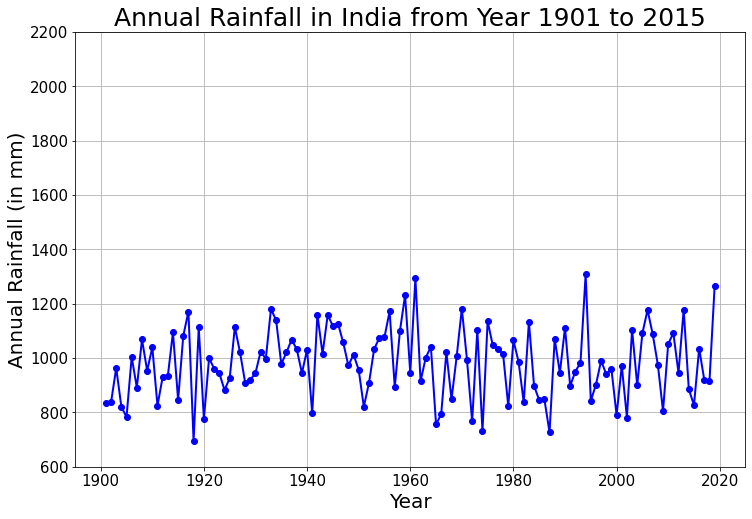

In [104]:
ax=India.groupby("YEAR").mean()['CI'].plot(ylim=(600,2200),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

In [114]:
df_ci = India[["CI"]]
df_ci

,CI
0,834.9
1,837.1
2,963.4
3,821.3
4,782.8
...,...
114,827.0
115,1035.2
116,919.6
117,914.1


In [115]:
# fix random seed for reproducibility
np.random.seed(7)

In [116]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df_ci = scaler.fit_transform(df_ci)

In [117]:
#split into train and test sets
train_size = int(len(df_ci) * 0.67)
test_size = len(df_ci) - train_size
train,test = scaled_df_ci[0:train_size,:], scaled_df_ci[train_size:len(df_ci),:]
print(len(train),len(test))

79 40


In [118]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [133]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# trainX
# reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))


In [120]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1,verbose=0)

In [121]:
# make predictions
trainPredict = model.predict(trainX,verbose=0)
# testPredict = model.predict(testX)

#Reshaping for inverse_transform
w = np.zeros((73,1))
trainPredict = np.append(trainPredict,w,axis=1)

y = np.zeros((73,1))
trainY = np.reshape(trainY,(-1,1))
trainY = np.append(trainY,y,axis=1)


In [135]:
x = np.zeros((34,1))
testPredict = np.append(testPredict,x,axis=1)

z = np.zeros((34,1))
testY = np.reshape(testY,(-1,1))
testY = np.append(testY,z,axis=1)

https://stackoverflow.com/questions/49330195/how-to-use-inverse-transform-in-minmaxscaler-for-a-column-in-a-matrix/49330312

http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc

In [122]:
# invert predictions (trainPredict and testPredict works! The actual value is the first column alone for both!)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
display(trainPredict) #for comparing the predicted and actual array!
display(trainY)



array([[1086.42724856,  694.9       ],
       [ 997.10313863,  694.9       ],
       [1040.05852449,  694.9       ],
       [1076.86698939,  694.9       ],
       [1063.72645314,  694.9       ],
       [1027.40354875,  694.9       ],
       [1003.74418107,  694.9       ],
       [ 992.49591131,  694.9       ],
       [ 975.79997602,  694.9       ],
       [ 961.18296556,  694.9       ],
       [1110.5760548 ,  694.9       ],
       [1040.45265826,  694.9       ],
       [ 937.96498161,  694.9       ],
       [1107.30693597,  694.9       ],
       [ 879.09583653,  694.9       ],
       [1014.1640126 ,  694.9       ],
       [ 955.34716625,  694.9       ],
       [ 995.97974945,  694.9       ],
       [ 982.4588721 ,  694.9       ],
       [1056.93347181,  694.9       ],
       [1010.45067468,  694.9       ],
       [1009.02637116,  694.9       ],
       [1070.94620235,  694.9       ],
       [1069.98858131,  694.9       ],
       [ 937.28253714,  694.9       ],
       [ 959.18767478,  6

array([[1003.7,  694.9],
       [ 891.5,  694.9],
       [1068.4,  694.9],
       [ 953.4,  694.9],
       [1039.8,  694.9],
       [ 824.8,  694.9],
       [ 929.9,  694.9],
       [ 933.1,  694.9],
       [1094.6,  694.9],
       [ 845.5,  694.9],
       [1081.6,  694.9],
       [1171.1,  694.9],
       [ 694.9,  694.9],
       [1112.9,  694.9],
       [ 775.7,  694.9],
       [ 999.8,  694.9],
       [ 960.7,  694.9],
       [ 943.9,  694.9],
       [ 882.2,  694.9],
       [ 926.4,  694.9],
       [1113.8,  694.9],
       [1021.3,  694.9],
       [ 909.7,  694.9],
       [ 920.5,  694.9],
       [ 945. ,  694.9],
       [1023.8,  694.9],
       [ 997.4,  694.9],
       [1180.4,  694.9],
       [1139.2,  694.9],
       [ 977.9,  694.9],
       [1020.8,  694.9],
       [1067.6,  694.9],
       [1032.7,  694.9],
       [ 944.5,  694.9],
       [1031. ,  694.9],
       [ 796.8,  694.9],
       [1160.2,  694.9],
       [1015.7,  694.9],
       [1158.5,  694.9],
       [1117.7,  694.9],


In [140]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
display(testPredict)
display(testY)

array([[689551.05698178, 427224.52      ],
       [692276.21410238, 427224.52      ],
       [694983.49618636, 427224.52      ],
       [697672.81340943, 427224.52      ],
       [700344.23313981, 427224.52      ],
       [702997.6655532 , 427224.52      ],
       [705633.2004739 , 427224.52      ],
       [708250.81544584, 427224.52      ],
       [710850.51046902, 427224.52      ],
       [713432.33045558, 427224.52      ],
       [715996.34277376, 427224.52      ],
       [718542.52496748, 427224.52      ],
       [721070.94440497, 427224.52      ],
       [723581.66845446, 427224.52      ],
       [726074.74202809, 427224.52      ],
       [728550.16512588, 427224.52      ],
       [731008.11739643, 427224.52      ],
       [733448.5314715 , 427224.52      ],
       [735871.54208757, 427224.52      ],
       [738277.21661285, 427224.52      ],
       [740665.64487165, 427224.52      ],
       [743036.8942322 , 427224.52      ],
       [745391.00960665, 427224.52      ],
       [747

array([[519540.04, 427224.52],
       [521626.96, 427224.52],
       [446743.36, 427224.52],
       [657951.94, 427224.52],
       [581165.56, 427224.52],
       [683117.74, 427224.52],
       [551580.4 , 427224.52],
       [584173.18, 427224.52],
       [604060.3 , 427224.52],
       [803974.96, 427224.52],
       [518005.54, 427224.52],
       [554588.02, 427224.52],
       [608725.18, 427224.52],
       [577789.66, 427224.52],
       [589267.72, 427224.52],
       [485658.28, 427224.52],
       [597369.88, 427224.52],
       [480256.84, 427224.52],
       [678575.62, 427224.52],
       [552992.14, 427224.52],
       [670780.36, 427224.52],
       [723137.5 , 427224.52],
       [668325.16, 427224.52],
       [599395.42, 427224.52],
       [494681.14, 427224.52],
       [646228.36, 427224.52],
       [671025.88, 427224.52],
       [580981.42, 427224.52],
       [723321.64, 427224.52],
       [544092.04, 427224.52],
       [508307.5 , 427224.52],
       [636100.66, 427224.52],
       [

In [ ]:
# # calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


In [139]:
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 258.29 RMSE
